In [26]:
from sympy import sympify
import matplotlib.pyplot as plt

# Função para calcular Runge-Kutta de quarta ordem

## Função para tratar equação

In [27]:
# Função para avaliar a equação
def eval_eq(equation_str, **kwargs):    
    return sympify(equation_str).subs(kwargs)    

## Para uma Equação

In [28]:
def runge_kutta_1(equacao: str, x_ini: float, x_fin: float, y_ini: float, h: float):
    # Lista que vai conter todos o valores de x e y
    x_values = [x_ini]
    y_values = [y_ini] 

    while x_values[-1] < x_fin:
        x_anterior = x_values[-1] # Pegando o último x calculado
        y_anterior = y_values[-1] # Pegando o último y calculado

        k1 = eval_eq(equacao, x=x_anterior, y=y_anterior)
        k2 = eval_eq(equacao, x=(x_anterior + (h/2)), y=(y_anterior + (h/2) * k1))
        k3 = eval_eq(equacao, x=(x_anterior + (h/2)), y=(y_anterior + (h/2) * k2))
        k4 = eval_eq(equacao, x=(x_anterior + h), y=(y_anterior + h * k3))

        # Calculando novo y com a fórmula: yi+1 = yi + h/6 * (k1 + 2(k2 + k3) + k4)
        y_new = y_anterior + (h/6) * (k1 + 2*(k2 + k3) + k4)

        # Aumentando x com passo h
        x_new = x_anterior + h 
        
        # Adicionando o novo x e novo y nas listas
        x_values.append(x_new)
        y_values.append(y_new)

    return x_values, y_values

In [46]:
x_values, y_values = runge_kutta_1(equacao='-y + x + 2', x_ini=0, x_fin=0.3, y_ini=2, h=0.1)

In [48]:
print(x_values)
print(y_values)

[0, 0.1, 0.2, 0.30000000000000004]
[2, 2.00483750000000, 2.01873090140625, 2.04081842200118]


## Plotando Gráfico

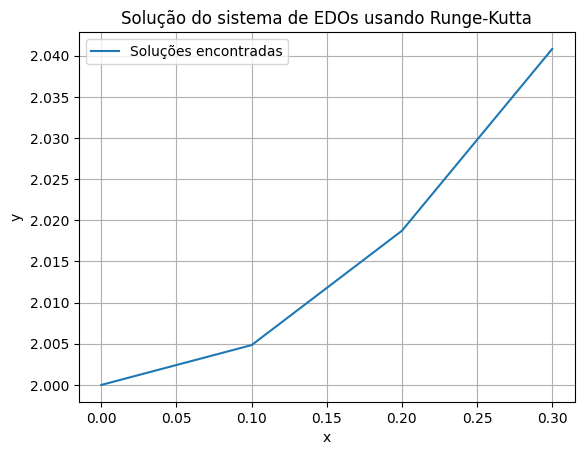

In [47]:
# Criação do gráfico
plt.plot(x_values, y_values, label='Soluções encontradas')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solução do sistema de EDOs usando Runge-Kutta')
plt.legend()
plt.grid(True)
plt.show()

## Para duas equações

#### Utilizando Euler Melhorado

In [43]:
def runge_kutta_2(equacao_1: str, equacao_2: str, x_ini: float, x_fin: float, y1_ini: float, y2_ini: float, h: float):
    # Lista que vai conter todos o valores de x, y1 e y2
    x_values = [x_ini]
    y1_values = [y1_ini]
    y2_values = [y2_ini] 

    while x_values[-1] < x_fin:
        x_anterior = x_values[-1] # Pegando o último x calculado
        y1_anterior = y1_values[-1] # Pegando o último y1 calculado
        y2_anterior = y2_values[-1] # Pegando o último y2 calculado


        # Primeira equação
        k11 = eval_eq(equacao_1, x=x_anterior, y1=y1_anterior, y2=y2_anterior)
        k12 = eval_eq(equacao_2, x=x_anterior, y1=y1_anterior, y2=y2_anterior)
        k21 = eval_eq(equacao_1, x=x_anterior + h, y1=(y1_anterior + (h * k11)), y2=(y2_anterior + (h * k12)))
        k22 = eval_eq(equacao_2, x=x_anterior + h, y1=(y1_anterior + (h * k11)), y2=(y2_anterior + (h * k12)))

        # Calculando novo y com a fórmula: y1,i+1 = y1i + (h/2) * (k11 + k21) / y2,i+1 = y2i + (h/2) * (k12 + k22)
        y1_new = y1_anterior + (h/2) * (k11 + k21)
        y2_new = y2_anterior + (h/2) * (k12 + k22)

        # Aumentando x com passo h
        x_new = x_anterior + h 
        
        # Adicionando o novo x e novo y nas listas
        x_values.append(x_new)
        y1_values.append(y1_new)
        y2_values.append(y2_new)

    return x_values, y1_values, y2_values

In [44]:
x_values, y1_values, y2_values = runge_kutta_2(equacao_1='y2', equacao_2='y1 + exp(x)', x_ini=0, x_fin=0.2, y1_ini=1, y2_ini=0, h=0.1)

In [45]:
print(x_values)
print(y1_values)
print(y2_values)

[0, 0.1, 0.2]
[1, 1.01000000000000, 1.04110170918076]
[0, 0.205258545903782, 0.423613522445092]


## Plotando gráfico

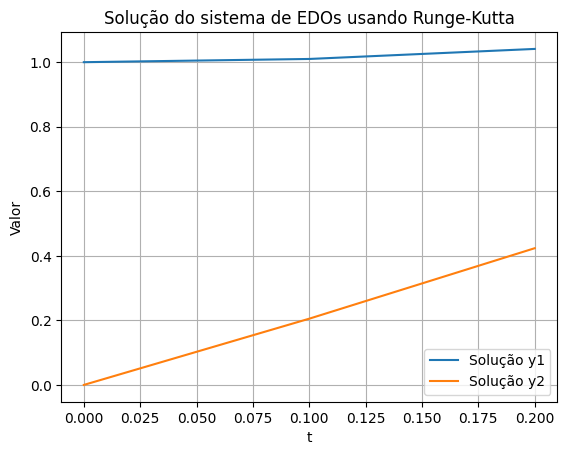

In [42]:
# Criação do gráfico
plt.plot(x_values, y1_values, label='Solução y1')
plt.plot(x_values, y2_values, label='Solução y2')
plt.xlabel('t')
plt.ylabel('Valor')
plt.title('Solução do sistema de EDOs usando Runge-Kutta')
plt.legend()
plt.grid(True)
plt.show()